# https://nirpyresearch.com/cricket-thermometer-intro-pca-python/

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [16]:
# Read the data
data = pd.read_csv('datasets/PCA/slr02.csv')
cs = data["X"].values
temp = data["Y"].values

In [17]:
# Take away the mean
x = cs - cs.mean()
y = temp - temp.mean()

In [18]:
# Group the data into a single matrix
datamatrix = np.array([x,y])

# Calculate the covariance matrix
covmat = np.cov(datamatrix)

In [19]:
# Find eigenvalues and eigenvectors of the covariance matrix
w,v = np.linalg.eig(covmat)

In [20]:
# Get the index of the largest eigenvalue
maxeig = np.argmax(w)

In [21]:
# Get the slope of the line passing through the origin and the largest eigenvector
m = -v[maxeig, 1]/v[maxeig, 0]
line = m*x

In [25]:
-v

array([[ 0.97746833,  0.21108215],
       [-0.21108215,  0.97746833]])

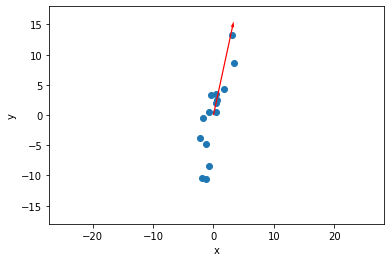

In [23]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.quiver(0,0, x[0], line[0], units = 'xy', scale = 1, color='r', width = 0.2)
plt.axis('equal')
plt.ylim((-18,18))
plt.show()

In [24]:
from sklearn.decomposition import PCA 

datazip = list(zip(x,y))
pca = PCA(n_components=2)
pca.fit(datazip)

# Print the eigenvectors
print(pca.components_)

[[ 0.21108215  0.97746833]
 [-0.97746833  0.21108215]]
